In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_df = pd.read_csv('data/clinicaltrial_data.csv') 

# Read the Mouse and Drug Data and the Clinical Trial Data

drug_data = pd.merge(mouse_drug_df, clinical_trial_df, on='Mouse ID')
drug_data.head()
# Combine the data into a single dataset


# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [18]:
tumor_vol_df = drug_data.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [21]:
std_error = tumor_vol_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
std_error.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

In [23]:
cap_mean = std_error.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_mean = std_error.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_mean = std_error.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_mean = std_error.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [24]:
cap_sem = std_error.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_sem = std_error.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_sem = std_error.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_sem = std_error.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

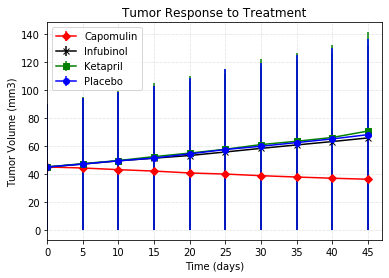

<Figure size 432x288 with 0 Axes>

In [55]:

ax = plt.subplot(111)

x_axis = np.arange(0, 50, 5)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

ax.errorbar(x_axis, cap_mean, yerr=cap_sem, fmt="red", marker="D", label="Capomulin")
ax.errorbar(x_axis, inf_mean, yerr=inf_sem, fmt="black", marker='x',label="Infubinol")
ax.errorbar(x_axis, ket_mean, yerr=ket_sem, fmt="green", marker='s',label="Ketapril")
ax.errorbar(x_axis, plc_mean, yerr=plc_sem, fmt="blue", marker='o',label="Placebo")

ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        

plt.show()
plt.savefig("../Images/tumor.png")

In [28]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [31]:
meta_sites = drug_data.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
meta_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2


In [32]:
mean_sem_meta = meta_sites.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [33]:
cap_mtmean_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_mtmean_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ket_mtmean_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plc_mtmean_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [36]:
cap_mtsem_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_mtsem_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ket_mtsem_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plc_mtsem_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


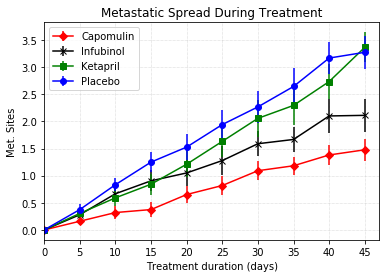

<Figure size 432x288 with 0 Axes>

In [54]:

ax = plt.subplot(111)

x_axis = np.arange(0, 50, 5)


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment duration (days)")
plt.ylabel("Met. Sites")


ax.errorbar(x_axis, cap_mtmean_list, yerr=cap_mtsem_list, fmt="red", marker="D", label="Capomulin")
ax.errorbar(x_axis, inf_mtmean_list, yerr=inf_mtsem_list, fmt="black", marker='x',label="Infubinol")
ax.errorbar(x_axis, ket_mtmean_list, yerr=ket_mtsem_list, fmt="green", marker='s',label="Ketapril")
ax.errorbar(x_axis, plc_mtmean_list, yerr=plc_mtsem_list, fmt="blue", marker='o', label="Placebo")


ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        

plt.show()
plt.savefig("../Images/metastic.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [40]:
mouse_survival = drug_data.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
mouse_survival.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [41]:
cap_surv = mouse_survival.loc['Capomulin'].tolist()
inf_surv = mouse_survival.loc['Infubinol'].tolist()
ket_surv = mouse_survival.loc['Ketapril'].tolist()
plc_surv = mouse_survival.loc['Placebo'].tolist()

In [42]:
cap_survrate = [(x/cap_surv[0])*100 for x in cap_surv]
inf_survrate = [(x/inf_surv[0])*100 for x in inf_surv]
ket_survrate = [(x/ket_surv[0])*100 for x in ket_surv]
plc_survrate = [(x/plc_surv[0])*100 for x in plc_surv]

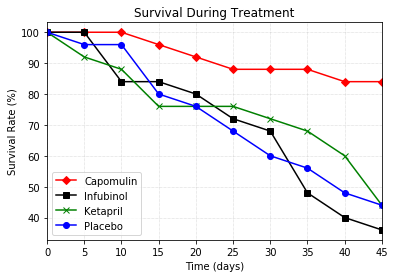

<Figure size 432x288 with 0 Axes>

In [53]:
ax = plt.subplot(111)

x_axis = np.arange(0, 50, 5)


plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

 
ax.plot(x_axis, cap_survrate, color="red", marker='D', label="Capomulin")
ax.plot(x_axis, inf_survrate, color="black", marker='s', label="Infubinol")
ax.plot(x_axis, ket_survrate, color="green", marker='x', label="Ketapril")
ax.plot(x_axis, plc_survrate, color="blue", marker='o', label="Placebo")

ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis))
        

plt.show()
plt.savefig("../Images/survival.png")

In [47]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug




In [48]:
cap_tv_change = int(((cap_mean[-1] - cap_mean[0])/cap_mean[0])*100)
inf_tv_change = int(((inf_mean[-1] - inf_mean[0])/inf_mean[0])*100)
ket_tv_change = int(((ket_mean[-1] - ket_mean[0])/ket_mean[0])*100)
plc_tv_change = int(((plc_mean[-1] - plc_mean[0])/plc_mean[0])*100)

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

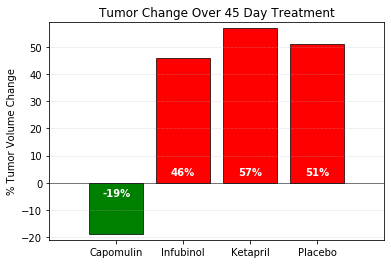

<Figure size 432x288 with 0 Axes>

In [56]:

y = [cap_tv_change, inf_tv_change, ket_tv_change, plc_tv_change]

x_axis = np.arange(len(y))


colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')


tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)


plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])


plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)


plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)


plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)


def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)


plt.show()
plt.savefig("../Images/tumor_growth.png")

![Metastatic Spread During Treatment](../Images/change.png)